In [28]:
#importing necessary libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [29]:
image_path=r'C:\Users\muska\OneDrive\Desktop\Academics\316\DIP Project Final\DIP\Sunflower.png' #  image path
img= cv.imread(image_path) # reading the image 
rows, cols = img.shape[:2] #finding the number of rows and colums of the image

### Converting to GrayScale

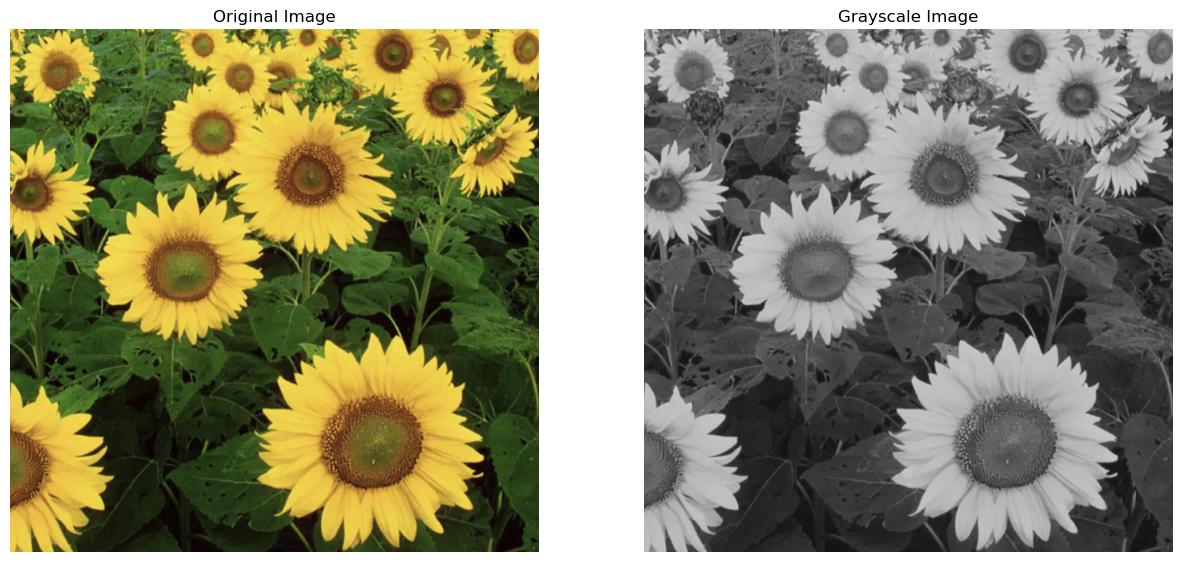

In [30]:
# Converting image to YCrCb format, so that Y can give the grayscale image
coeffs = np.array([65.738, 129.057, 25.064]) / 256.0
offset = 16
B, G, R = cv.split(img) # Splitting image in R, G and B channels
Y = offset + (R * coeffs[0] + G * coeffs[1] + B * coeffs[2])

# Displaying the images
plt.figure(figsize=(15, 10))

# Showing Original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off') 
plt.title('Original Image')

# Showing Grayscale image using Y
plt.subplot(1, 2, 2)
plt.imshow(Y, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Grayscale Image')

plt.show()

### Enhancing Contrast

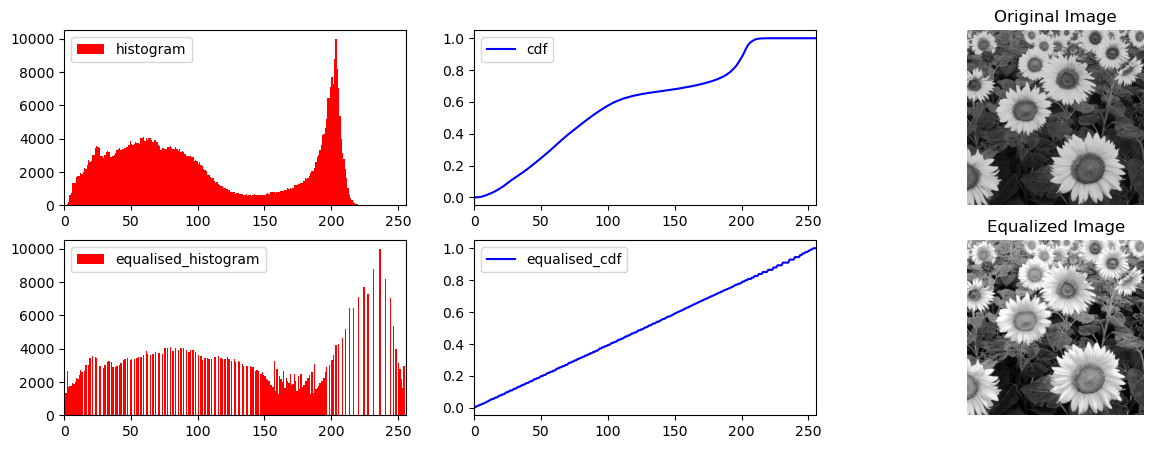

In [31]:

img_init = gray_img.copy()
img_fin = gray_img.copy()
flatenned_img_init = img_init.flatten()  # Flatten the initial image to get an array of pixel values
hist_init, ret = np.histogram(flatenned_img_init,256,[0,256]) # Calculate histogram of the array flattened_img_init
cdf_init = hist_init.cumsum() # calculate cdf from this histogram
cdf_normalized_init = cdf_init*1.0 / cdf_init.max() # Normalize this cdf

# Creating mappings for each pixel value
mappings = [0]*256
for i in range(256):
    mappings[i] = int(255.0*cdf_normalized_init[i])
# altering the pixel values on the basis of the mapping created by iterating over each pixel
for i in range(rows):
    for j in range(cols):
        img_fin[i, j] = mappings[(int)(img_init[i, j])]

flatenned_img_fin = img_fin.flatten()        # Now flatten the final image to get an array of pixel values
hist_fin, ret = np.histogram(flatenned_img_fin,256,[0,256]) # Calculate histogram of the array flattened_img_fin
cdf_fin = hist_fin.cumsum()   # calculate cdf from this histogram
cdf_normalized_fin = cdf_fin*1.0 / cdf_fin.max() # Normalize this cdf

# Displaying the images
fig, axs = plt.subplots(2, 3, figsize=(15, 5))

# Showing the initial histogram
axs[0][0].hist(flatenned_img_init, 256, [0, 256], color='r')
axs[0][0].set_xlim([0, 256])
axs[0][0].legend(['histogram'], loc='upper left')

# Showing the initial cdf
axs[0][1].plot(cdf_normalized_init, color='b')
axs[0][1].set_xlim([0, 256])
axs[0][1].legend(['cdf'], loc='upper left')

# Showing the initial image 
axs[0][2].imshow(img_init, cmap='gray', vmin=0, vmax=255)
axs[0][2].axis('off')
axs[0][2].set_title('Original Image')

# Showing the final/equalised histogram
axs[1][0].hist(flatenned_img_fin, 256, [0, 256], color='r')
axs[1][0].set_xlim([0, 256])
axs[1][0].legend(['equalised_histogram'], loc='upper left')

# Showing the final cdf   
axs[1][1].plot(cdf_normalized_fin, color='b')
axs[1][1].set_xlim([0, 256])
axs[1][1].legend(['equalised_cdf'], loc='upper left')

# Showing the enhanced image
axs[1][2].imshow(img_fin, cmap='gray', vmin=0, vmax=255)
axs[1][2].axis('off')
axs[1][2].set_title('Equalized Image')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

### Cropping

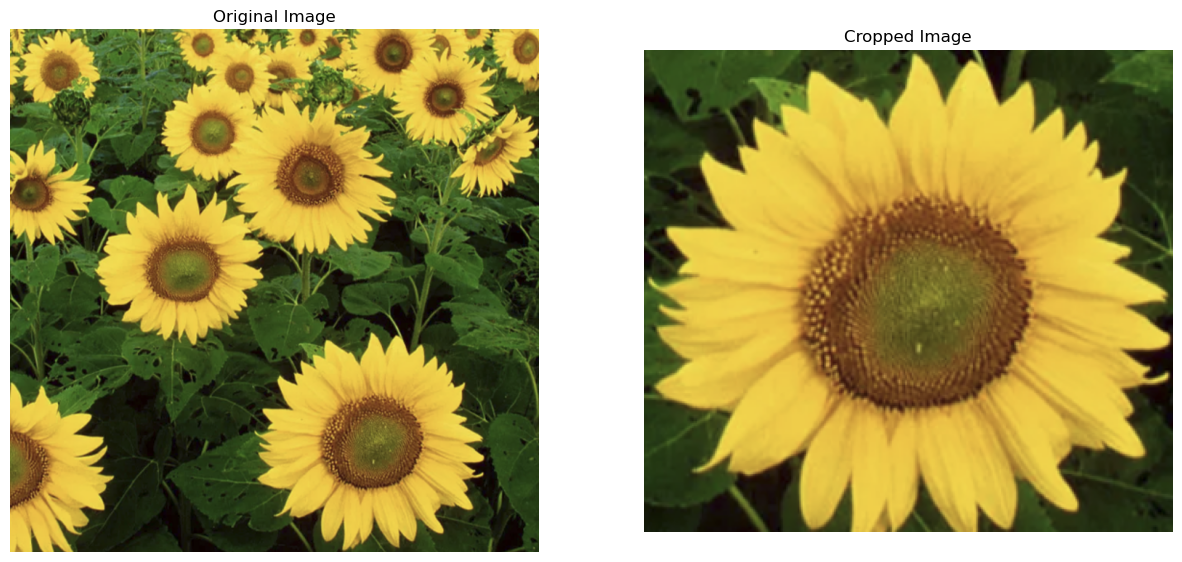

In [32]:
points = [] # created a dynamic array named points
#defining the function get_coordinates
def get_coordinates(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        points.append((x, y)) # appending the coordinates selected in points
        if len(points) == 2: # if length of points is equal to 2 close the window popped
            cv.destroyAllWindows() 

cv.imshow('Crop_The_Image', img)
cv.setMouseCallback('Crop_The_Image', get_coordinates)
cv.waitKey(0)
x1, y1 = points[0] # 1st coordinate
x2, y2 = points[1] # 2nd coordinate
cropped_image = img[y1:y2, x1:x2] # taking the sub image 

#plotting the final results
plt.figure(figsize=(15, 10))
# for original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off') 
plt.title('Original Image')
# for cropped image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Cropped Image')

plt.show()
    

### Watermarking

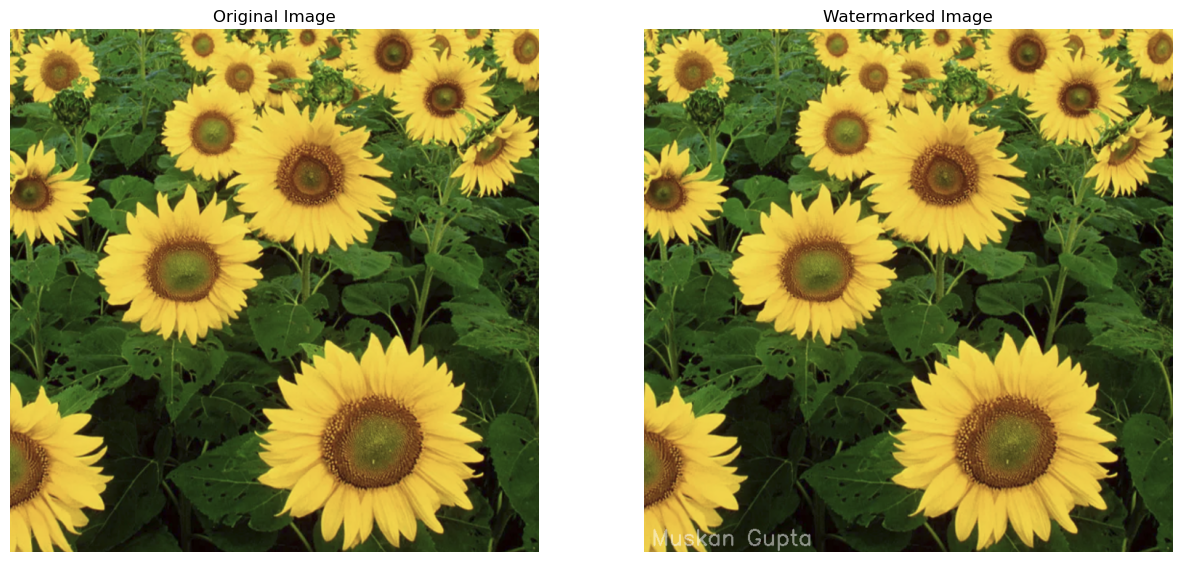

In [33]:
points = [] # creating a dynamic array named points
# function to get coordinates of a point 
def get_coordinates(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        points.append((x, y)) # appending the coordinates selected in points
        cv.destroyAllWindows() 

cv.imshow('Add_A_Watermark', img)
cv.setMouseCallback('Add_A_Watermark', get_coordinates)
cv.waitKey(0)
x, y = points[0] # coordinate of the point
watermarked_image = img.copy() # the final image of which watermark is to be added
# Defining font size, colour, style and text
font = cv.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)  
thickness = 2
text = "Muskan Gupta"
text_size = cv.getTextSize(text, font, font_scale, thickness)[0]
alpha = 0.5


if x<cols//3 and y<rows//3:       # top left corner
    text_x = 10
    text_y = text_size[1] + 10
elif x>2*cols//3 and y<rows//3:    #  top right corner
    text_x = cols - text_size[0] - 10
    text_y = text_size[1] + 10
elif x<cols//3 and y>2*rows//3:   # bottom left corner
    text_x = 10
    text_y = rows - 10
elif x>2*cols//3 and y>2*rows//3:      # bottom right corner
    text_x = cols - text_size[0] - 10
    text_y = rows - 10
else:                                  # middle portion
    text_x = cols//2 - 10 - text_size[0]//2
    text_y = rows//2 - 10 + text_size[1]//2

# Watermarking the image by adding weighted images of watermarked_image and img
cv.putText(watermarked_image, text, (text_x, text_y), font, font_scale, font_color, thickness)    
watermarked_image = cv.addWeighted(watermarked_image, alpha, img, 1 - alpha, 0)

# Displaying the images
plt.figure(figsize=(15, 10))

# Showing original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off') 
plt.title('Original Image')

# Showing watermarked image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(watermarked_image, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Watermarked Image')

plt.show()

### Changing HSV in an image

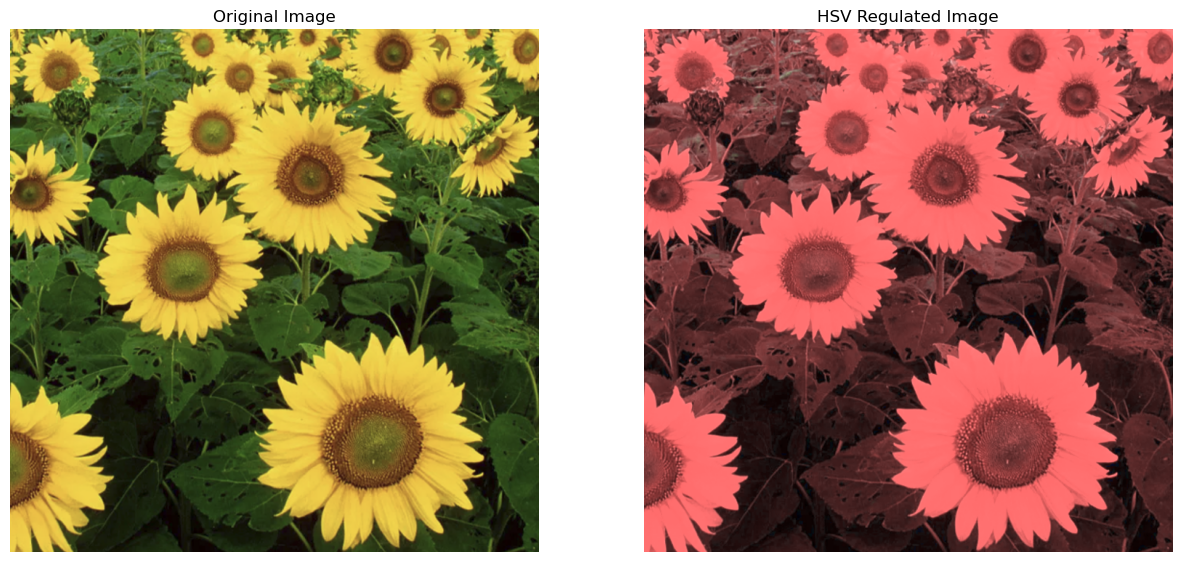

In [34]:
hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV) # converting RGB to HSV

cv.namedWindow('Image Adjustments') # creating window named Image Adjustments

cv.createTrackbar('Hue', 'Image Adjustments', 0, 179, lambda x: x)  # creating trackbar for Hue having values from 0 to 179
cv.createTrackbar('Saturation', 'Image Adjustments', 0, 255, lambda x: x) # creating trackbar for Saturation having values from 0 to 255
cv.createTrackbar('Brightness', 'Image Adjustments', 0, 255, lambda x: x)  # creating trackbar for Brightness having values from 0 to 255
# setting trackbar positions initially 
cv.setTrackbarPos('Hue', 'Image Adjustments', 90) 
cv.setTrackbarPos('Saturation', 'Image Adjustments', 127)
cv.setTrackbarPos('Brightness', 'Image Adjustments', 127)
# creating while loop for adjusting trackbar position
while True:
    # taking the h,s,v value according to the Trackbar position
    h = cv.getTrackbarPos('Hue', 'Image Adjustments')
    s = cv.getTrackbarPos('Saturation', 'Image Adjustments')
    v = cv.getTrackbarPos('Brightness', 'Image Adjustments')

    adjusted_image = hsv_image.copy() # creating the copy of hsv_image
    # adjusting the hsv values according to trackbar position in adjusted_image
    adjusted_image[:, :, 0] = np.clip(adjusted_image[:, :, 0] + (h - 90), 0, 179) 
    adjusted_image[:, :, 1] = np.clip(adjusted_image[:, :, 1] * (s / 127), 0, 255)
    adjusted_image[:, :, 2] = np.clip(adjusted_image[:, :, 2] * (v / 127), 0, 255)
    # converting adjusted hsv image into adjusted rgb image 
    adjusted_bgr = cv.cvtColor(adjusted_image, cv.COLOR_HSV2BGR)
    #showing final adjusted rgb image
    cv.imshow('Image Adjustments', adjusted_bgr)
    # close the popped window when q is pressed
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cv.destroyAllWindows()
# plotting the final results
plt.figure(figsize=(15, 10))
# for original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off') 
plt.title('Original Image')
# for HSv regulated image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(adjusted_bgr, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off')
plt.title('HSV Regulated Image')

plt.show()

### Resizing and Scaling

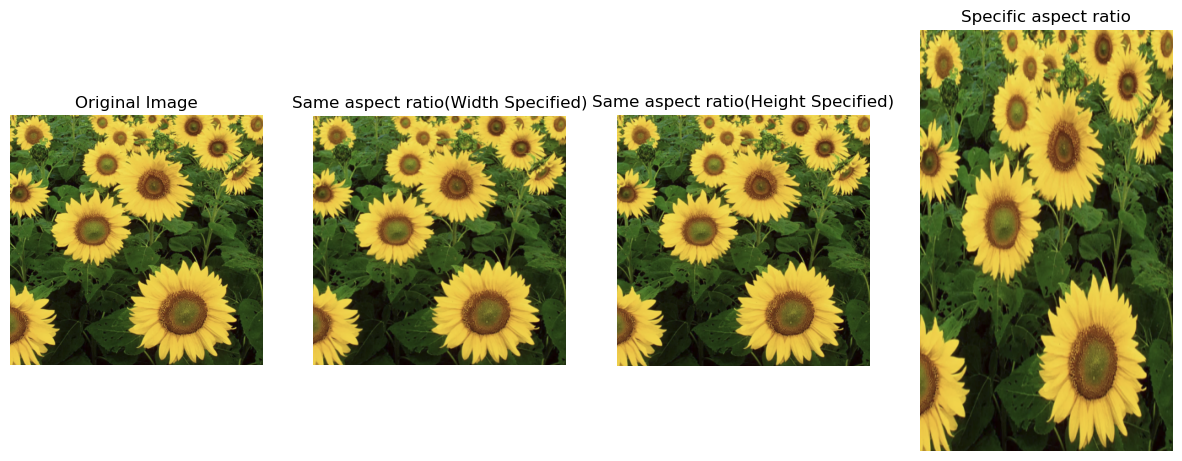

In [35]:
width = 300 # width specified
height = 500 # height specified
h, w = img.shape[:2] # finding number of ropws and colums of image
new_width = width # new width specified
new_height = int(h * (width / w)) # new height calculated according to aspect ratio of original image
width_resized_image =  cv.resize(img, (new_width, new_height), interpolation=cv.INTER_AREA) # width_specified resized image 
new_height = height #new height specified
new_width = int(w * (height / h)) # new width calculated according to aspect ration of original image
height_resized_image =  cv.resize(img, (new_width, new_height), interpolation=cv.INTER_AREA) # height specified resized image
resized_image = cv.resize(img, (width, height), interpolation=cv.INTER_AREA) # resized image on changing the aspect ratio according to width and height specified

# plotting the results
plt.figure(figsize=(15, 10))
# Original image
plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off') 
plt.title('Original Image')
# Width specified image when aspect ratio is constant
plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(width_resized_image, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Same aspect ratio(Width Specified)')
# height specified image when aspect ratio is constant
plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(height_resized_image, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off') 
plt.title('Same aspect ratio(Height Specified)')
# Image with new aspect ratio
plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(resized_image, cv.COLOR_BGR2RGB), vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Specific aspect ratio')

plt.show()

### Noise Removal

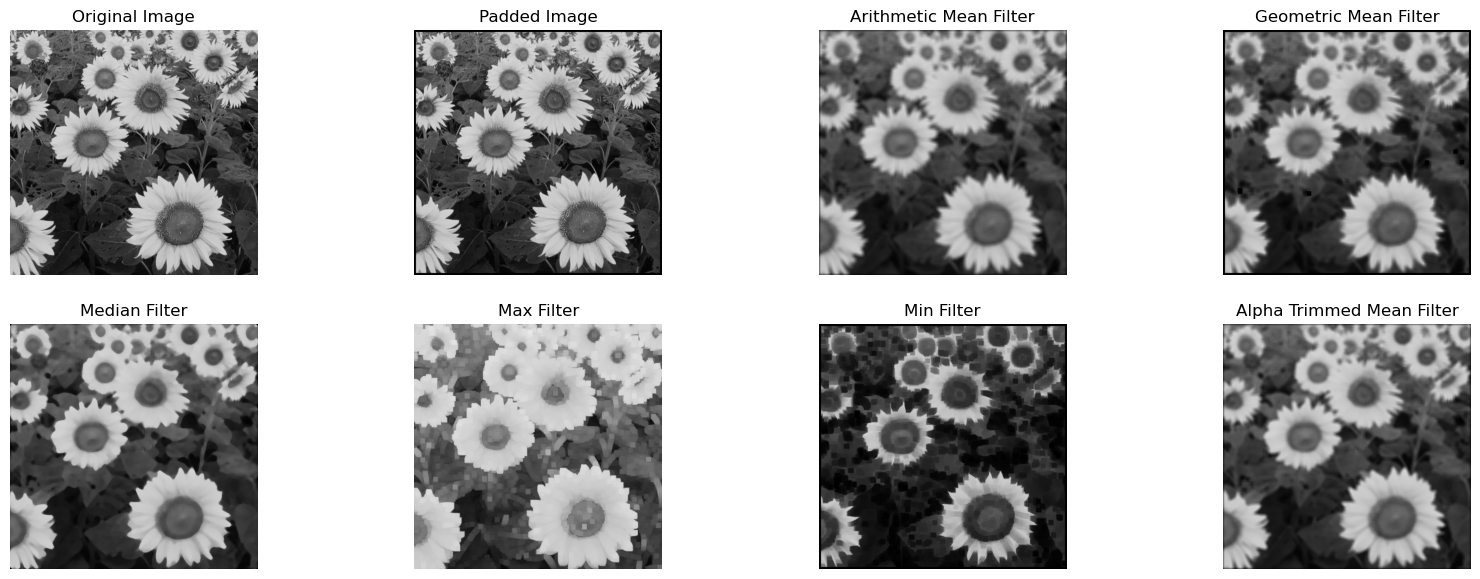

In [36]:
# Defining the kernel size
n = 13
# Defining the pad width for zero padding
pad_width = n // 2
original_height=img.shape[0]  # height of original image
# converting image in grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
original_width = img_gray.shape[1] # width of original image

#  height and width of padded image
new_height = original_height + 2 * pad_width
new_width = original_width + 2 * pad_width

# Creating a padded image with all values zeros
padded_img = np.full((new_height, new_width), 0, dtype=np.uint8)

# Now copying the orginal image in the center of paddded image
padded_img[pad_width:pad_width + original_height, pad_width:pad_width + original_width] = img_gray[0:original_height, 0:original_width]

# Creating images for the storing output
arithmeticMeanFilter = np.zeros_like(img_gray)
geometricMeanFilter = np.zeros_like(img_gray)
medianFilter = np.zeros_like(img_gray)
maxFilter = np.zeros_like(img_gray)
minFilter = np.zeros_like(img_gray)
alphaTrimmedMeanFilter = np.zeros_like(img_gray)

# iterating over each pixel
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        neighborhood = padded_img[i:i+n, j:j+n].flatten()  # converting a neighorhood kernel to an array
        # Arithmetic mean filtering
        arithmeticMeanFilter[i, j] = np.mean(neighborhood) 
        # geometric mean filtering
        x = neighborhood**(1.0/(n*n))
        geometricMeanFilter[i, j] = np.prod(x)
        # median filtering
        medianFilter[i, j] = np.median(neighborhood)
        # max filtering
        maxFilter[i, j] = np.max(neighborhood)
        # min filtreing
        minFilter[i, j] = np.min(neighborhood)
        # alpha-trimmed mean filtering
        y = np.sort(neighborhood)
        alpha = 0.1
        alphaTrimmedMeanFilter[i, j] = np.mean(y[int(alpha*len(y)):int((1-alpha)*len(y))])

# we are setting size of output image
plt.figure(figsize=(20, 7))

# showing original image
plt.subplot(2, 4, 1)
plt.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off') 
plt.title('Original Image')

# showing padded image
plt.subplot(2, 4, 2)
plt.imshow(padded_img, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Padded Image')

# showing result of Arthemetic mean filtered image
plt.subplot(2, 4, 3)
plt.imshow(arithmeticMeanFilter, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Arithmetic Mean Filter')

# showing result of Gaussian filtered image
plt.subplot(2, 4, 4)
plt.imshow(geometricMeanFilter, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Geometric Mean Filter')

# showing result of median filtered image
plt.subplot(2, 4, 5)
plt.imshow(medianFilter, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Median Filter')

# showing result of max filtered image
plt.subplot(2, 4, 6)
plt.imshow(maxFilter, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Max Filter')

# showing result of min filtered image
plt.subplot(2, 4, 7)
plt.imshow(minFilter, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Min Filter')

# showing result of alpha trimmed filtered image
plt.subplot(2, 4, 8)
plt.imshow(alphaTrimmedMeanFilter, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Alpha Trimmed Mean Filter')

plt.show()

### Blurring and Sharpening

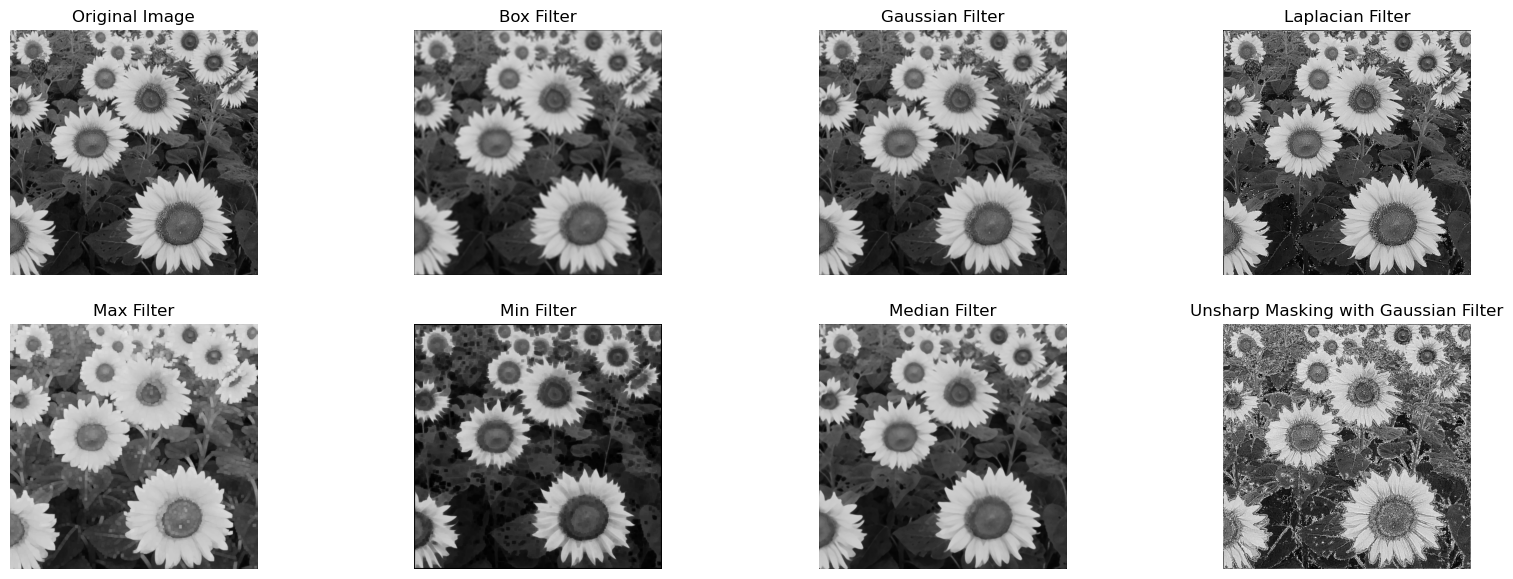

In [37]:
# Defining the kernel size
n = 7
# Defining the pad width for zero padding
pad_width = n // 2
original_height=img.shape[0] # height of original image
# converting image in grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
original_width = img_gray.shape[1] # width of original image

#  height and width of padded image
new_height = original_height + 2 * pad_width
new_width = original_width + 2 * pad_width

# Creating a padded image with all values zeros
padded_img = np.full((new_height, new_width), 0, dtype=np.uint8)

# Now copying the orginal image in the center of paddded image
padded_img[pad_width:pad_width + original_height, pad_width:pad_width + original_width] = img_gray[0:original_height, 0:original_width]


# Creating images for the storing output
box_filter_image = np.zeros_like(img_gray)
gaussian_filter_image= np.zeros_like(img_gray)
laplacian_filter_image = np.zeros_like(img_gray)
max_filter_image = np.zeros_like(img_gray)
min_filter_image = np.zeros_like(img_gray)
median_filter_image = np.zeros_like(img_gray)
unsharp_mask_image = np.zeros_like(img_gray)

# Define the box filter kernel of size n*n 
box_filter_kernel = np.ones((n, n), dtype=np.uint8) / (n*n)

# making Gaussian kernel
ax = np.arange(-n // 2 + 1., n // 2 + 1.)  # setting the range
xx, yy = np.meshgrid(ax, ax) # xx for horizontal range, yy for vertical range
kernel = np.exp(-(xx**2 + yy**2) / (2. * (1**2))) # this is formula of Gaussian kernal taking sigma =1 
# now normalize kernel 
gaussian_filter_kernel = kernel / np.sum(kernel)

# pre defining laplacian kernel that we are using directly to get the output
laplacian_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 

# iterating over each pixel
for i in range(original_height):
    for j in range(original_width):
        area = padded_img[i:i + n, j:j + n] # get n * n matrix from image to be operated with kernel
        # box filtering
        box_filter_image[i, j] = np.sum(area * box_filter_kernel) 
        # gaussian filtering
        gaussian_filter_image[i, j] = np.sum(area * gaussian_filter_kernel)
        # max filtering
        max_filter_image[i, j] = np.max(area)
        # min filtering
        min_filter_image[i, j] = np.min(area)
        # median filtering
        median_filter_image[i, j] = np.median(area)
        # Unsharp masking
        k = 10
        unsharp_mask_image[i, j] = (1+k)*img_gray[i, j] - k*gaussian_filter_image[i, j]
        # Laplacian filtering
        area = padded_img[i:i + 3, j:j + 3]
        laplacian_filter_image[i, j] = np.sum(area * laplacian_kernel)

# we are setting size of output image
plt.figure(figsize=(20, 7))

# showing original image
plt.subplot(2, 4, 1)
plt.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Original Image')

# showing result of box filtered image
plt.subplot(2, 4, 2)
plt.imshow(box_filter_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Box Filter')

# showing result of gaussian filtered image
plt.subplot(2, 4, 3)
plt.imshow(gaussian_filter_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Gaussian Filter')

# showing result of laplacian filtered image
plt.subplot(2, 4, 4)
plt.imshow(laplacian_filter_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Laplacian Filter')

# showing result of max filtered image
plt.subplot(2, 4, 5)
plt.imshow(max_filter_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Max Filter')

# showing result of min filtered image
plt.subplot(2, 4, 6)
plt.imshow(min_filter_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Min Filter')

# showing result of median filtered image
plt.subplot(2, 4, 7)
plt.imshow(median_filter_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Median Filter')

# showing result of unsharp masking
plt.subplot(2, 4, 8)
plt.imshow(unsharp_mask_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Unsharp Masking with Gaussian Filter')

plt.show()



### Edge Detection

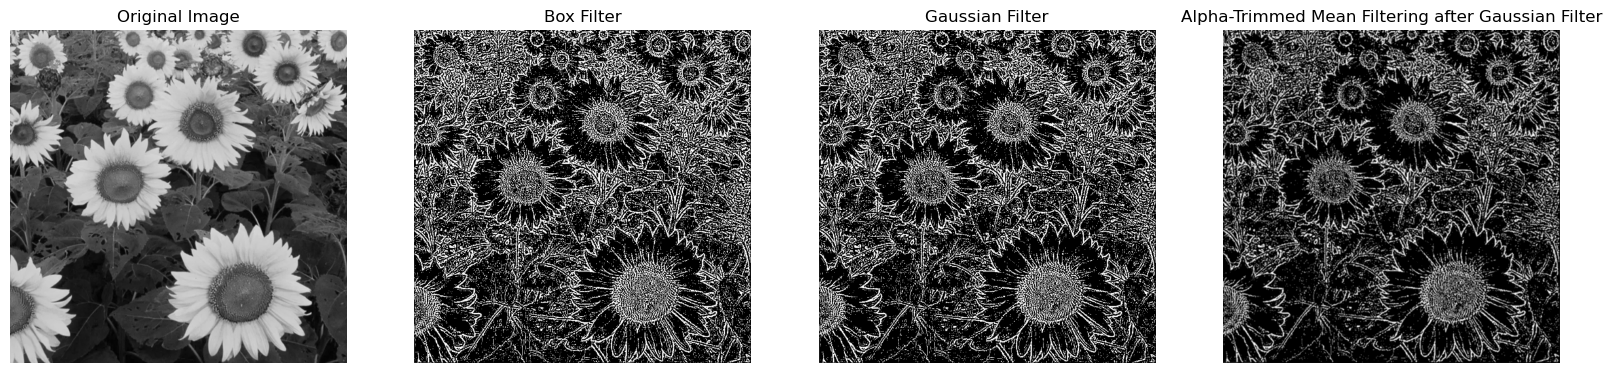

In [38]:
# Defining the kernel size
n = 3
# Defining the pad width for zero padding
pad_width = n // 2
original_height=img.shape[0] # height of original image
# converting image in grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
original_width = img_gray.shape[1] # width of original image

#  height and width of padded image
new_height = original_height + 2 * pad_width
new_width = original_width + 2 * pad_width

# Creating a padded image with all values zeros
padded_img = np.full((new_height, new_width), 0, dtype=np.uint8)

# Now copying the orginal image in the center of paddded image
padded_img[pad_width:pad_width + original_height, pad_width:pad_width + original_width] = img_gray[0:original_height, 0:original_width]

# Creating images for the storing output
box_filter_image = np.zeros_like(img_gray)
gaussian_filter_image= np.zeros_like(img_gray)
gaussian_filter_image_corrected = np.zeros_like(img_gray)
max_filtered = np.zeros_like(img_gray)
subtracted = np.zeros_like(img_gray)

# Define the box filter kernel of size n*n 
box_filter_kernel = np.ones((n, n), dtype=np.uint8) / (n*n)

# making Gaussian kernel
ax = np.arange(-n // 2 + 1., n // 2 + 1.) # setting the range
xx, yy = np.meshgrid(ax, ax) # xx for horizontal range, yy for vertical range
kernel = np.exp(-(xx**2 + yy**2) / (2. * (1**2))) # this is formula of Gaussian kernal taking sigma =1 
# now normalize kernel 
gaussian_filter_kernel = kernel / np.sum(kernel)

# Now applying box filter kernel and gaussian filter kernel 
for i in range(original_height):
    for j in range(original_width):
        area = padded_img[i:i + n, j:j + n] # getting region of interest for kernel
        box_filter_image[i, j] = 1*img_gray[i, j] - 1*np.sum(area * box_filter_kernel) #subtract box fileterd image from original to get edges
        gaussian_filter_image[i, j] = 1*img_gray[i, j] - 1*np.sum(area * gaussian_filter_kernel) #subtract gaussian fileterd image from original to get edges
        
# For alpha trimmed 
n=3
for i in range(original_height):
    for j in range(original_width):
        area = gaussian_filter_image[i:i + n, j:j + n] #selecting area where we have to apply filter kernel
        y = np.sort(area.flatten()) # sorting of the pixel value so that we can discard values from both side
        alpha = 0.1
        # calculate the lower and upper bound and keep the keep in this range and discarding other 
        lower_bound = int(alpha * len(y))
        upper_bound = int((1 - alpha) * len(y))

        # calculate mean of trimmed pixel values (that are in lower and upper bound range)
        if lower_bound < upper_bound:
            mean_value = np.mean(y[lower_bound:upper_bound])
        else:
            mean_value = 0 # default if lower and upper bound overlap

            # get the mean values and insert in the image to get output image
        gaussian_filter_image_corrected[i, j] = np.clip(mean_value, 0, 255).astype(np.uint8)

# we are setting size of output image
plt.figure(figsize=(20, 7))

# showing original image
plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Original Image')

# showing box filter image (low pass)
plt.subplot(1, 4, 2)
plt.imshow(box_filter_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Box Filter')

# showing gaussian filter image
plt.subplot(1, 4, 3)
plt.imshow(gaussian_filter_image, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Gaussian Filter')

# showing Alpha trimmed mean filter image
plt.subplot(1, 4, 4)
plt.imshow(gaussian_filter_image_corrected, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Alpha-Trimmed Mean Filtering after Gaussian Filter')

plt.show()